# Lightning Fast Deep Learning with Flash
---

Flash is a framework of tasks for fast prototyping, baselining, finetuning and solving business and scientific problems with deep learning.
It is focused on:

1. Predictions
1. Finetuning
1. Task-based training


# Some of the Deep Learning Tasks supported by Flash -

#### Image
- Classification
- Segmentation
- Object Detection
- Style Transfer

#### Text
- Text Classification
- Question Answering

#### Audio
- Classification
- Speech Recognition

#### Tabular
- Classification
- Regression

#### Video
- Classification


In [81]:
import torch
import flash
from flash.image import SemanticSegmentationData
from flash.image import SemanticSegmentation
from flash.core.data.utils import download_data
import matplotlib.pyplot as plt

## Image Classification Training

It is a multistep process-

1. Load Dataset
2. Build Model
3. Create Loss function and Optimizer
4. Train Model

In [2]:
import torch

import flash
from flash.core.data.utils import download_data
from flash.image import ImageClassificationData, ImageClassifier

In [97]:
# download_data("https://pl-flash-data.s3.amazonaws.com/hymenoptera_data.zip", "/Users/aniket/data/")

In [123]:
datamodule = ImageClassificationData.from_folders(
    train_folder="~/data/hymenoptera_data/train/",
    val_folder="~/data/hymenoptera_data/val/",
    batch_size=8,
    transform_kwargs={"image_size": (196, 196), "mean": (0.485, 0.456, 0.406), "std": (0.229, 0.224, 0.225)},
)

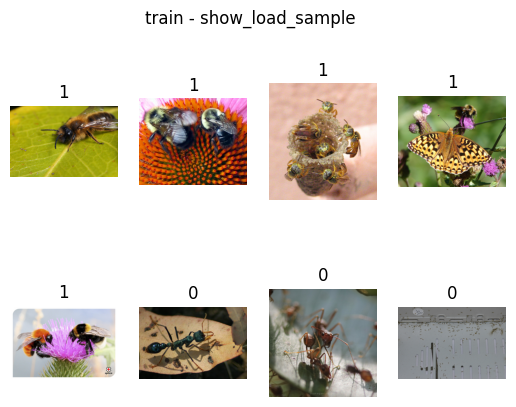

In [124]:
datamodule.show_train_batch()

In [125]:
# https://github.com/kentaroy47/timm_speed_benchmark

model = ImageClassifier(backbone="efficientnet_b0", num_classes=datamodule.num_classes)

Using 'efficientnet_b0' provided by rwightman/pytorch-image-models (https://github.com/rwightman/pytorch-image-models).
05/21/2022 15:08:19 - INFO - timm.models.helpers -   Loading pretrained weights from url (https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0_ra-3dd342df.pth)


In [126]:
trainer = flash.Trainer(max_epochs=5, accelerator="auto")
trainer.finetune(model, datamodule=datamodule, strategy="freeze")
trainer.save_checkpoint("demo_model.pt")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type           | Params
-------------------------------------------------
0 | train_metrics | ModuleDict     | 0     
1 | val_metrics   | ModuleDict     | 0     
2 | test_metrics  | ModuleDict     | 0     
3 | adapter       | DefaultAdapter | 4.0 M 
-------------------------------------------------
44.6 K    Trainable params
4.0 M     Non-trainable params
4.0 M     Total params
16.040    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/Users/aniket/miniconda3/envs/am/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/aniket/miniconda3/envs/am/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/aniket/miniconda3/envs/am/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1927: PossibleUserWarning: The number of training batches (30) is smaller than the

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [127]:
data_dir = "/Users/aniket/data"


# 4. Predict what's on a few images! ants or bees?
datamodule = ImageClassificationData.from_files(
    predict_files=[
        f"{data_dir}/hymenoptera_data/val/bees/65038344_52a45d090d.jpg",
        f"{data_dir}/hymenoptera_data/val/bees/590318879_68cf112861.jpg",
        f"{data_dir}/hymenoptera_data/val/ants/540543309_ddbb193ee5.jpg",
    ],
    batch_size=3
)
predictions = trainer.predict(model, datamodule=datamodule, output="labels")
print(predictions)

/Users/aniket/miniconda3/envs/am/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 30it [00:00, ?it/s]

[[1, 1, 0]]


/Users/aniket/miniconda3/envs/am/lib/python3.9/site-packages/flash/core/classification.py:237: UserWarning: No labels were provided, this output will act as a Classes output.
  rank_zero_warn("No labels were provided, this output will act as a Classes output.", category=UserWarning)


In [128]:
from PIL import Image

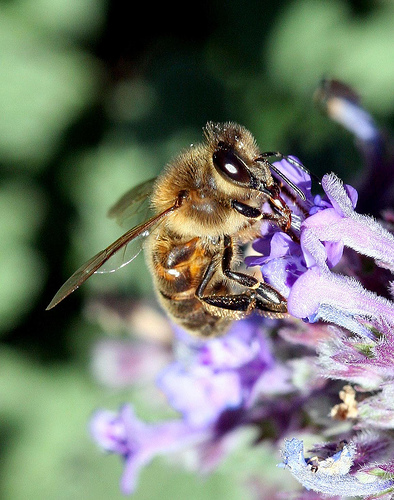

In [129]:
Image.open(f"{data_dir}/hymenoptera_data/val/bees/65038344_52a45d090d.jpg")

## Training Semantic Segmentation

In [36]:
download_data(
    "https://github.com/ongchinkiat/LyftPerceptionChallenge/releases/download/v0.1/carla-capture-20180513A.zip",
    data_dir,
)

/Users/aniket/data/carla-capture-20180513A.zip:   0%|          | 0/586339 [00:00<?, ?KB/s]

In [38]:
dm = SemanticSegmentationData.from_folders(
    train_folder=f"{data_dir}/CameraRGB",
    train_target_folder=f"{data_dir}/CameraSeg",
    val_split=0.1,
    transform_kwargs=dict(image_size=(256, 256)),
    num_classes=21,
    batch_size=4,
)

In [80]:
model = SemanticSegmentation.load_from_checkpoint(
    "https://flash-weights.s3.amazonaws.com/0.7.0/semantic_segmentation_model.pt"
)

/Users/aniket/miniconda3/envs/am/lib/python3.9/site-packages/pytorch_lightning/utilities/parsing.py:261: UserWarning: Attribute 'metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['metrics'])`.
  rank_zero_warn(
Using 'mobilenetv3_large_100' provided by qubvel/segmentation_models.pytorch (https://github.com/qubvel/segmentation_models.pytorch).
Using 'fpn' provided by qubvel/segmentation_models.pytorch (https://github.com/qubvel/segmentation_models.pytorch).


In [43]:
# 3. Create the trainer and finetune the model
trainer = flash.Trainer(max_epochs=3, gpus=torch.cuda.device_count())
trainer.finetune(model, datamodule=datamodule)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [46]:
datamodule = SemanticSegmentationData.from_files(
    predict_files=[
        f"{data_dir}/CameraRGB/F61-1.png",
        f"{data_dir}/CameraRGB/F62-1.png",
        f"{data_dir}/CameraRGB/F63-1.png",
    ],
    batch_size=3,
)
predictions = trainer.predict(model, datamodule=datamodule)

Predicting: 0it [00:00, ?it/s]

In [75]:
x = predictions[0][0]["preds"]
# x = predictions[0][0]['input']

In [76]:
x = x.permute((1,2,0)).numpy()

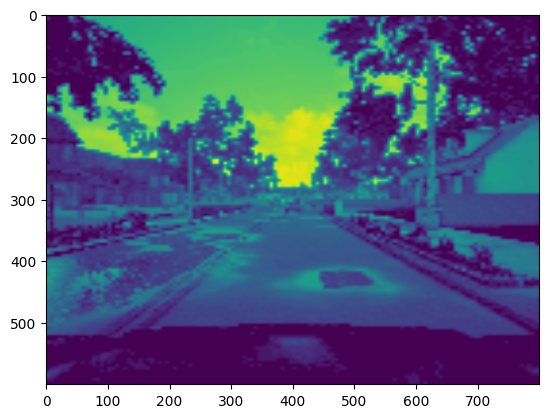

In [74]:
plt.imshow(x[..., 2])

In [ ]:
s